# Mobile inverted pendulum python dynamics new

author:SeongHyeon Kim

program:PYDY balancing robot simulator


필요한 라이브러리 포함


In [1]:
from sympy import sin, cos, symbols, solve, Matrix, init_printing
from sympy.physics.mechanics import *
from sympy.physics.vector import ReferenceFrame
import sympy.physics.mechanics as me
import sympy as sm
import math as m
import numpy as np

In [2]:
init_vprinting()

# Reference frames

N은 외부의 기준 프레임. 속도를 0으로

In [3]:
#Newtonian reference frame
N=ReferenceFrame('N')

# Define a world coordinate origin
No = Point('No')
No.set_vel(N, 0)

In [4]:
F = ReferenceFrame('F')

P = ReferenceFrame('P')

F = N.orientnew('F', 'Axis',[psi, N.z] )     # Intermediate reference frame

P = F.orientnew('P', 'Axis', [theta, F.y])   # Inverted Pendulum

기준프레임.dcm(상대프레임)

## Newtonian, Bodies, Frames, Particles, Points


In [5]:
Mp =sm.symbols('Mp')
M = sm.symbols('M')

Po = me.Point('p_cm')
Lo = me.Point('L_cm')
body_l_f = me.ReferenceFrame('L_f')

Ro = me.Point('R_cm')
body_r_f = me.ReferenceFrame('R_f')

frame_f = me.ReferenceFrame('f')
Ip = me.Point('I_p')
LN = me.Point('ln')
RN = me.Point('rn')

## Variables, Constants and Specified


In [6]:


x = me.dynamicsymbols('x')            # F1> measure number of Velocity of P in N
xd = me.dynamicsymbols('x', 1)
xd2 = me.dynamicsymbols('x', 2)
theta = me.dynamicsymbols('theta')    # F2> measure number of Angular velocity of P in N
thetad = me.dynamicsymbols('theta', 1)
thetad2 = me.dynamicsymbols('theta', 2)
delta = me.dynamicsymbols('delta')    # N3> measure number of Angular velocity of P in N
deltad = me.dynamicsymbols('delta', 1)
deltad2 = me.dynamicsymbols('delta', 2)

wL = me.dynamicsymbols('wL')          # Angular Position of L in N
wR = me.dynamicsymbols('wR')          # Angular Position of R in N


g = sm.symbols('g', real=True)        #Gravitational acceleration
d = sm.symbols('d', real=True)        # Distance from point I to Lo (or Ro)
R = sm.symbols('r', real=True)        #Radius of wheels
l = sm.symbols('l', real=True)        # Distance from point I to mass center of P
t = sm.symbols('t')


# Create q vectors
q = Matrix([x, theta, delta])
qd = q.diff()

## Generalized speed

In [7]:
u1 = me.dynamicsymbols('u1')           #x-dot
u2 = me.dynamicsymbols('u2')           #theta-dot     
u3 = me.dynamicsymbols('u3')           #delta-dot   
u4 = me.dynamicsymbols('u4')           #wL-dot
u5 = me.dynamicsymbols('u5')           #wR-dot
uL = Matrix([u1, u2, u3])

## Mass and Inertia

관성모멘트함수=inertia(기준 좌표, xx, yy,zz회전)

In [8]:
K,J = symbols('K J')

In [9]:
I_L = inertia(F, K,J,K)                          #Wheel inertia 
I_R = inertia(F, K,J,K)


In [10]:
m_b = symbols('m_b')                              #Mass of the body
I1, I2, I3 = symbols('I1 I2 I3')                  #Moments of inertia of body

In [11]:
# Calculate inertia of body
Ib = inertia(F, I1, I2, I3)

###  Geometry relating unit vectors

In [12]:
F.orient(N, 'Axis', [delta, N.z])

In [13]:
P.orient(F, 'Axis', [theta, F.y])

In [14]:
N.dcm(F)

⎡cos(δ)  -sin(δ)  0⎤
⎢                  ⎥
⎢sin(δ)  cos(δ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [15]:
F.dcm(P)

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

## Position vectors

기준.locatenew('이름', 이동*단위백터)

In [16]:
I = No.locatenew('I', x*F.x)      # Point No to I

Po = I.locatenew('Po', l*P.z)     # Point I to mass center of P

Lo = I.locatenew('Lo', d*F.y)     # Point I to center of wheel L

Ro = I.locatenew('Ro', -d*F.y)    # Point I to center of wheel R

In [17]:
LN = Lo.locatenew('LN', -R*F.z)   # Center of wheel L to contact point LN

RN = Ro.locatenew('RN', -R*F.z)   # Center of wheel R to contact point RN

## Angular Velocities


In [18]:
F.set_ang_vel(N, u3*N.z)        # Angular velocity of F in N

P.set_ang_vel(F, u2*F.y)        # Angular velocity of P in F

body_l_f.set_ang_vel(F, u4*F.y)    # wL is related to w and v due to rolling

body_r_f.set_ang_vel(F, u5*F.y)    # wR is related to w and v due to rolling

## Velocities of relevant points


v2pt_theory는 선속도를 의미


$$^I\mathbf{v}^{P_2} = ^I\mathbf{v}^{P_1} + ^I\omega^A \times \mathbf{r}^{\frac{P_2}{P_1}}$$

The `Point.v2pt_theory()` method makes it easy to do this calculation.

측정점.v2pt_theory(회전 중심점, 관찰틀, 회전틀(돌아가는 애))



속도를 측정하는게 아니고 부여하는거 같다 좀더 알아보자

In [19]:
V_I_N = I.set_vel(N, u1*F.x)             # Velocity of point I in N

V_PO_N = Po.v2pt_theory(I,N,P)           # Velocity of center of mass of P

V_LO_N = Lo.v2pt_theory(I, N,P,)         # Velocity of center of L

V_RO_N = Ro.v2pt_theory(I,N,P)           # Velocity of center of R

V_LN_N = LN.v2pt_theory(Lo,N,body_l_f)          # Velocity of contact point of L

V_RN_N = RN.v2pt_theory(Ro,N,body_r_f)          # Velocity of contact point of R

RigidBody =강체 선언 (입자로 저장된다고 한다)


 B = RigidBody ( '이름' ,질량 중심, 프레임 ,질량, ( I , P ))
 

In [20]:
body_p = me.RigidBody('body_p', Po, P, Mp, (Ib, Po))
body_l = me.RigidBody('body_l', Lo, body_l_f, M, (I_L, Lo))
body_r = me.RigidBody('body_r', Ro, body_r_f, M,(I_R, Ro))

### Forces

#### gravity

In [21]:
#중력벡터
Gravity = -g * N.z      #Gravity Vector

In [22]:
body_gravity_vector =-g*Mp*N.z

In [23]:
leftwheel_gravity_vector = - M*g*N.z

In [24]:
rightwheel_gravity_vector = - M*g*N.z

In [25]:
b_g_f = (Po, body_gravity_vector)

In [26]:
l_g_f = (Lo, leftwheel_gravity_vector)

In [27]:
r_g_f = (Ro, rightwheel_gravity_vector)

In [28]:
type(Po)

sympy.physics.vector.point.Point

In [29]:
type(body_gravity_vector)

sympy.physics.vector.vector.Vector

### Torques

바퀴가 받는 토크, 바퀴에 의해 생기는 몸의 반작용 토크

In [30]:
body_torque_scala, Lwheel_torque_scala, Rwheel_torque_scala = dynamicsymbols('T_b, T_r, T_l')

In [31]:
Lwheel_torque_vector = Lwheel_torque_scala * F.y

In [32]:
Rwheel_torque_vector = Rwheel_torque_scala * F.y

In [33]:
body_torque_vector = -Lwheel_torque_vector -Rwheel_torque_vector

In [34]:
Lwheel_torque = (body_l_f, Lwheel_torque_vector)

In [35]:
Rwheel_torque = (body_r_f, Rwheel_torque_vector)

In [36]:
body_torque = (P, body_torque_vector)

In [37]:
body_torque

(P, (-T_l(t) - T_r(t))*F.y)

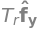

In [38]:
Lwheel_torque_vector

### Equations of Motions

q는 위치 dq 속력

In [39]:
q

⎡x⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣δ⎦

In [40]:
FL = [b_g_f,
         r_g_f,
         l_g_f,
         Lwheel_torque,
         Rwheel_torque,
         body_torque]
FL

[(Po, - Mp*g*N.z),
 (Ro, - M*g*N.z),
 (Lo, - M*g*N.z),
 (L_f, T_r(t)*F.y),
 (R_f, T_l(t)*F.y),
 (P, (-T_l(t) - T_r(t))*F.y)]

## Constraints

어떤 곳에 구속되어있는걸 Holonomic 이라고 하는듯 바퀴를 평면에 구속해야함

### holomic

In [41]:
Dependent1 =dot(V_LN_N ,F.x)

In [42]:
Dependent2 = dot(V_RN_N, F.x)

In [43]:
v_cons = [Dependent1,
          Dependent2]

v_cons

In [44]:
acc_cons = [Dependent1.diff(t),Dependent2.diff(t)] 

In [45]:
u_aux = [u4.diff(t), u5.diff(t)]

# Kinematical Differential Equations

In [46]:
kde = [x.diff() - u1,
       theta.diff() - u2,
       delta.diff() - u3]
kde

# 운동방정식으로 만들자

## Generalized Forces

[토크힘] x [속도,각속도]

[Cm속도, 앞바퀴각속도, 뒷바퀴각속도, 몸체 각속도] x [중력, 앞바퀴토크, 뒷바퀴토크, Cm토크] 

VnWxTnF

In [47]:
from __future__ import print_function, division

In [48]:
from sympy import trigsimp
from sympy.physics.mechanics import KanesMethod
from sympy.functions import transpose

In [49]:
from sympy.physics.vector import init_vprinting

In [50]:
BL = [body_p,body_l,body_r]
BL

[body_p, body_l, body_r]

In [51]:
kane = KanesMethod(
    N,
    q,
    uL,
    kd_eqs=kde,
    q_dependent=None,
    configuration_constraints=None,
    u_dependent=[u4,u5],
    velocity_constraints=v_cons,
    acceleration_constraints=acc_cons,
    u_auxiliary=u_aux,
    bodies=None,
    forcelist=None,
)

In [52]:
fr, frstar = kane.kanes_equations( BL, FL)

In [53]:
kane.kindiffdict()

F + F* =0 식 (Kanes equation)

In [54]:
kanearray = trigsimp(fr + frstar)
kanearray = kanearray.subs(u4.diff(), (u1.diff()-d*u3.diff())/R)
kanearray = kanearray.subs(u5.diff(), (u1.diff()+d*u3.diff())/R)   #holonomic constrains

## Linearization

3.52 식 참고

In [55]:
update0 =kanearray.expand()

a = msubs(rhs, {d: 0}) # 0과 1에서만 작동

In [56]:
update1=update0.subs(sin(theta) , theta)

In [57]:
update2 = update1.subs(cos(theta) , 1)

In [58]:
update3 = update2.subs(sin(2*theta) , 2 *theta)

In [59]:
update3

⎡                2⋅J⋅u₁̇                     2            2                   
⎢              - ────── - 2⋅M⋅u₁̇ + Mp⋅l⋅θ⋅u₂  + Mp⋅l⋅θ⋅u₃  - Mp⋅l⋅u₂̇ - Mp⋅u₁
⎢                   2                                                         
⎢                  r                                                          
⎢                                                                             
⎢                                           2     2       2                   
⎢                   -I₂⋅u₂̇ + Mp⋅g⋅l⋅θ + Mp⋅l ⋅θ⋅u₃  - Mp⋅l ⋅u₂̇ - Mp⋅l⋅u₁̇ - 
⎢                                                                             
⎢              2                                                              
⎢         2⋅J⋅d ⋅u₃̇                 2          2  2            2             
⎢-I₃⋅u₃̇ - ───────── - 2⋅K⋅u₃̇ - 2⋅M⋅d ⋅u₃̇ - Mp⋅l ⋅θ ⋅u₃̇ - 2⋅Mp⋅l ⋅θ⋅u₂⋅u₃ -
⎢              2                                                              
⎢             r                                     

In [60]:
update4 = update3.row_del(3)

In [61]:
update5 = update4.row_del(3)

In [62]:
update6 = update5.subs(theta*u3,0)

In [63]:
update7 = update6.subs(theta*u1,0)

In [64]:
linear = update7.subs(theta*u3.diff(),0)

In [65]:
linear = linear.subs(u1, x.diff())
linear = linear.subs(u2, theta.diff())
linear = linear.subs(u3, delta.diff())
linear = linear.subs(thetad*thetad,0)         #이유를 잘 모르겠다이건

In [66]:
linear = trigsimp(linear)
linear

⎡      2⋅J⋅ẍ                           Tₗ   Tᵣ    ⎤
⎢    - ───── - 2⋅M⋅ẍ - Mp⋅l⋅θ̈ - Mp⋅ẍ + ── + ──    ⎥
⎢         2                            r    r     ⎥
⎢        r                                        ⎥
⎢                                                 ⎥
⎢                         2                       ⎥
⎢  -I₂⋅θ̈ + Mp⋅g⋅l⋅θ - Mp⋅l ⋅θ̈ - Mp⋅l⋅ẍ - Tₗ - Tᵣ  ⎥
⎢                                                 ⎥
⎢             2                                   ⎥
⎢        2⋅J⋅d ⋅δ̈                2     d⋅Tₗ   d⋅Tᵣ⎥
⎢-I₃⋅δ̈ - ──────── - 2⋅K⋅δ̈ - 2⋅M⋅d ⋅δ̈ + ──── - ────⎥
⎢            2                          r      r  ⎥
⎣           r                                     ⎦

Equilibrium Point 에서 선형화한 식과 같다.3.21

## Modeling

In [67]:
torques = Matrix([Lwheel_torque_scala,Rwheel_torque_scala])
torques

⎡Tᵣ⎤
⎢  ⎥
⎣Tₗ⎦

In [68]:
qd

⎡ẋ⎤
⎢ ⎥
⎢θ̇⎥
⎢ ⎥
⎣δ̇⎦

In [69]:
xdotform = Matrix([1,2,3])

In [70]:
sols = sm.linsolve(linear,xd2,thetad2, deltad2)

In [71]:
(xdotform[0], xdotform[1], xdotform[2]) = tuple(*sols)

u2,u3 에서 nonlinear 로 안풀린다

In [72]:
Ad = xdotform.jacobian(qd)
Ad.simplify()
Ad

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [73]:
Ac = xdotform.jacobian(q)
Ac.simplify()
Ac

⎡                           2    2  2                          ⎤
⎢                        -Mp ⋅g⋅l ⋅r                           ⎥
⎢0  ────────────────────────────────────────────────────────  0⎥
⎢                    2          2           2           2  2   ⎥
⎢   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r    ⎥
⎢                                                              ⎥
⎢                       ⎛           2       2⎞                 ⎥
⎢                Mp⋅g⋅l⋅⎝2⋅J + 2⋅M⋅r  + Mp⋅r ⎠                 ⎥
⎢0  ────────────────────────────────────────────────────────  0⎥
⎢                    2          2           2           2  2   ⎥
⎢   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r    ⎥
⎢                                                              ⎥
⎣0                             0                              0⎦

In [74]:
Ab = sm.eye(3)
Ab

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [75]:
Aa = sm.zeros(3)
Aa

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [76]:
A = Matrix([[Aa,Ab],
           [Ac,Ad]])

In [77]:
A

⎡0                             0                              0  1  0  0⎤
⎢                                                                       ⎥
⎢0                             0                              0  0  1  0⎥
⎢                                                                       ⎥
⎢0                             0                              0  0  0  1⎥
⎢                                                                       ⎥
⎢                           2    2  2                                   ⎥
⎢                        -Mp ⋅g⋅l ⋅r                                    ⎥
⎢0  ────────────────────────────────────────────────────────  0  0  0  0⎥
⎢                    2          2           2           2  2            ⎥
⎢   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r             ⎥
⎢                                                                       ⎥
⎢                       ⎛           2       2⎞                          ⎥
⎢                Mp⋅g⋅l⋅⎝2⋅J + 2⋅M⋅r  

In [78]:
B = xdotform.jacobian(torques)
B.simplify()
B

⎡                  ⎛         2         ⎞                                     ⎛
⎢                r⋅⎝I₂ + Mp⋅l  + Mp⋅l⋅r⎠                                   r⋅⎝
⎢────────────────────────────────────────────────────────  ───────────────────
⎢                 2          2           2           2  2                   2 
⎢2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  
⎢                                                                             
⎢            ⎛           2                2⎞                           ⎛      
⎢           -⎝2⋅J + 2⋅M⋅r  + Mp⋅l⋅r + Mp⋅r ⎠                          -⎝2⋅J + 
⎢────────────────────────────────────────────────────────  ───────────────────
⎢                 2          2           2           2  2                   2 
⎢2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  
⎢                                                                             
⎢                         -d⋅r                      

 토크는 논문과 완전히 같은값이 나옴 pendulum과 rotation  나눠야함

## State variable equation

In [79]:
control_vector_u = Matrix([[1,1],
                          [1, -1]])

In [80]:
BU = B* control_vector_u/2
BU

⎡                  ⎛         2         ⎞                                      
⎢                r⋅⎝I₂ + Mp⋅l  + Mp⋅l⋅r⎠                                      
⎢────────────────────────────────────────────────────────                   0 
⎢                 2          2           2           2  2                     
⎢2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r                      
⎢                                                                             
⎢            ⎛           2                2⎞                                  
⎢           -⎝2⋅J + 2⋅M⋅r  + Mp⋅l⋅r + Mp⋅r ⎠                                  
⎢────────────────────────────────────────────────────────                   0 
⎢                 2          2           2           2  2                     
⎢2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r                      
⎢                                                                             
⎢                                                   

In [81]:
BU = BU.col_del(1)

In [82]:
BU

In [83]:
penx = Matrix([x , theta, xd, thetad])
penx

⎡x⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎢ẋ⎥
⎢ ⎥
⎣θ̇⎦

In [84]:
pen_sys = xdotform.jacobian(penx)
pen_sys.simplify()
pen_sys

⎡                           2    2  2                             ⎤
⎢                        -Mp ⋅g⋅l ⋅r                              ⎥
⎢0  ────────────────────────────────────────────────────────  0  0⎥
⎢                    2          2           2           2  2      ⎥
⎢   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r       ⎥
⎢                                                                 ⎥
⎢                       ⎛           2       2⎞                    ⎥
⎢                Mp⋅g⋅l⋅⎝2⋅J + 2⋅M⋅r  + Mp⋅r ⎠                    ⎥
⎢0  ────────────────────────────────────────────────────────  0  0⎥
⎢                    2          2           2           2  2      ⎥
⎢   2⋅I₂⋅J + 2⋅I₂⋅M⋅r  + I₂⋅Mp⋅r  + 2⋅J⋅Mp⋅l  + 2⋅M⋅Mp⋅l ⋅r       ⎥
⎢                                                                 ⎥
⎣0                             0                              0  0⎦

# Motor Dynamics

마찰은 0

In [85]:
# Create dynamic symbols for current and voltage
im = dynamicsymbols('im')        # Currents through motor 1 and 2
Vm = symbols('Vm')               # Voltages across the motor terminals
Nm = symbols('Nm')                             # Gear ratio
# Define some motor constants.
# Assuming motor 1 and 2 are the same:
Rm = symbols('Rm')                             # Coil resistance
Kt = symbols('Kt')                           # Motor constant
Ke = symbols('Ke')                           #역기전력 상수
Tm =  me.dynamicsymbols('Tm')                         #motor torque
Wm =  me.dynamicsymbols('Wm')                 #rotor position
Wmd = me.dynamicsymbols('Wm',1)
Wmd2 = me.dynamicsymbols('Wm',2)
Jm = me.dynamicsymbols('Jm')                 #rotor inertia
Bm = me.dynamicsymbols('Bm')      #모터의 감쇠상수



Ww =  me.dynamicsymbols('Ww')            # Wheel position
Wwd = me.dynamicsymbols('Ww', 1)
Wwd2 = me.dynamicsymbols('Ww', 2)
Tw =  me.dynamicsymbols('Tw')              #torque wheel

Mlhs =  Kt*Vm/Rm + Ke*Kt*Wmd/Rm
Mrhs = Jm*Wmd2 + Bm*Wmd + Tm

Tm = Tw/Nm
Wm = Nm*(Ww - theta)

In [86]:
Mrhs = Mrhs.subs(Wm , Nm*(Ww - theta))

In [87]:
Mrhs = Mrhs.subs(Tm, (Tw/Nm))

In [88]:
motoreq = Mlhs-Mrhs
motoreq

                                             2                  
Ke⋅Kt⋅Wṁ   Kt⋅Vm      ∂                     ∂                 Tw
──────── + ───── - Bm⋅──(Nm⋅(Ww - θ)) - Jm⋅───(Nm⋅(Ww - θ)) - ──
   Rm        Rm       ∂t                     2                Nm
                                           ∂t                   

In [89]:
motoreq = motoreq.subs(Wm.diff() , Nm.diff()*(Ww.diff() - theta.diff()))
motoreq

                                                   2                  
Ke⋅Kt⋅(Wẇ - θ̇)   Kt⋅Vm      ∂                     ∂                 Tw
────────────── + ───── - Bm⋅──(Nm⋅(Ww - θ)) - Jm⋅───(Nm⋅(Ww - θ)) - ──
      Rm           Rm       ∂t                     2                Nm
                                                 ∂t                   

In [90]:
Twe = sm.solve(motoreq, Tw)
Twe

In [91]:
Twe

무엇이 제어 입력 대상인지가 애매하다

xdot =  AX + Bu/ Y=CX(?)   /u = Twe

In [92]:
C =sm.eye(6)

Control

In [93]:
import control as con

In [94]:
sys = con.StateSpace(A,B,Imat,zzero)

NameError: name 'Imat' is not defined

### System parameter

In [ ]:
parameters= [g, m_b ,m_wf, m_wr]
parameter_vals=[9.81, 10., 5., 3.]
parameter_dict = dict(zip(parameters, parameter_vals))
parameter_dict